<ipython-input-48-ef60b4e13c5e>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


Accuracy: 0.40789473684210525
              precision    recall  f1-score   support

           A       0.75      0.06      0.11        52
           D       0.33      0.07      0.12        40
           H       0.40      0.93      0.56        60

    accuracy                           0.41       152
   macro avg       0.50      0.36      0.26       152
weighted avg       0.50      0.41      0.29       152



<ipython-input-48-ef60b4e13c5e>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.classes_, y=conf_matrix.sum(axis=0), palette='Blues')


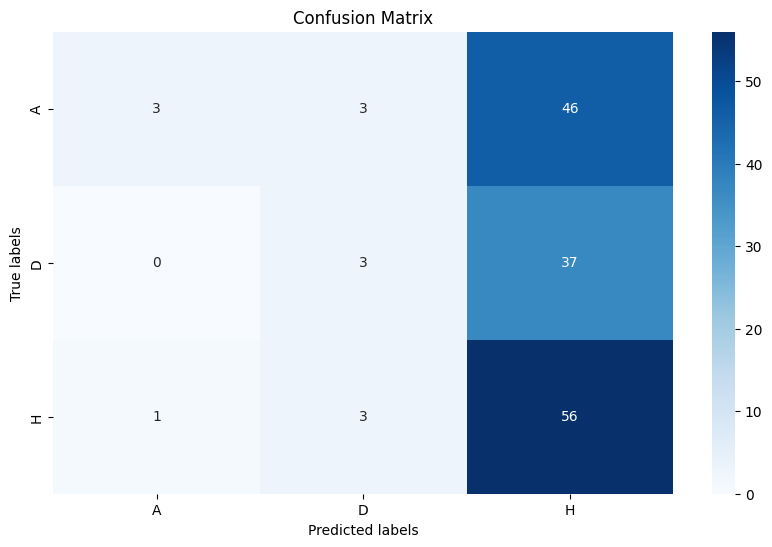

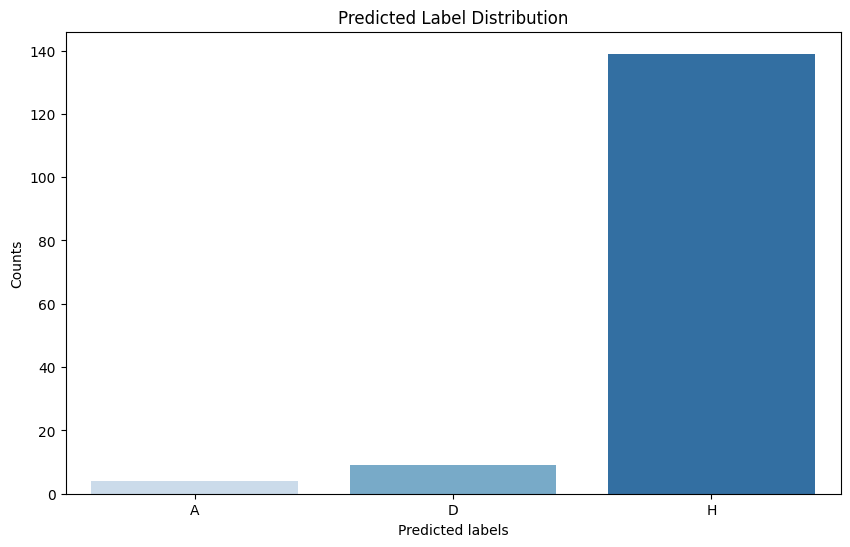

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/EPL/EPL 2015-16.csv'
df = pd.read_csv(file_path)

# Function to preprocess the data and create features from last 5 matches
def preprocess_data(df):
    # Sort data by date
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date')

    # Initialize lists to store new features
    team_stats = []

    # Iterate over each row to compute features from last 5 matches
    for index, row in df.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']

        home_last_5 = df[(df['HomeTeam'] == home_team) | (df['AwayTeam'] == home_team)].iloc[:index].tail(5)
        away_last_5 = df[(df['HomeTeam'] == away_team) | (df['AwayTeam'] == away_team)].iloc[:index].tail(5)

        home_stats = {
            'team': home_team,
            'last_5_FTR': ','.join(home_last_5['FTR']),
            'last_5_FTHG': ','.join(home_last_5['FTHG'].astype(str)),
            'last_5_FTAG': ','.join(home_last_5['FTAG'].astype(str)),
            'next_match_outcome': row['FTR']  # Outcome of the next match
        }

        away_stats = {
            'team': away_team,
            'last_5_FTR': ','.join(away_last_5['FTR']),
            'last_5_FTHG': ','.join(away_last_5['FTHG'].astype(str)),
            'last_5_FTAG': ','.join(away_last_5['FTAG'].astype(str)),
            'next_match_outcome': row['FTR']  # Outcome of the next match
        }

        team_stats.append(home_stats)
        team_stats.append(away_stats)

    # Create DataFrame with computed features
    df_stats = pd.DataFrame(team_stats)

    return df_stats

# Preprocess the data
df_stats = preprocess_data(df)

# Define features and target
features = ['last_5_FTR', 'last_5_FTHG', 'last_5_FTAG']
target = 'next_match_outcome'  # Outcome of the next match

X = df_stats[features]
y = df_stats[target]

# Convert categorical features into dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (e.g., Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Convert the heatmap to a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=model.classes_, y=conf_matrix.sum(axis=0), palette='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Counts')
plt.title('Predicted Label Distribution')
plt.show()
